# Assignment 1

Se empezará realizando la primera solicitud, calculando la ganancia o profit de la empresa en SGD, tomando en cuenta también las ligas y websites más y menos rentables.

In [84]:
# Importacion de librerías

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [85]:
# Carga del Dataset

df = pd.read_csv('DA_Test.csv')

league_names = {
    3: "English Premier League",
    4: "La Liga",
    5: "Serie A",
    6: "Bundesliga",
    13: "UEFA Champions League",
    187: "Indonesia League 1",
    48952: "Copa Libertadores",
    56025: "Mexico Primera Division",
    57605: "Copa Sudamericana",
    86: "Spain Liga B",
    136: "France Ligue 2"
}

In [86]:
# Creación de la columna de profit en SGD y calculo de la ganancia

df['Profit_SGD'] = df['Winlost'] * df['ActualRate']

total_profit_sgd = df['Profit_SGD'].sum()
print("Total Profit (SGD):", total_profit_sgd)

Total Profit (SGD): 19167264.575693578


In [87]:
# Profit por liga

profit_by_league = df.groupby('LeagueId')['Profit_SGD'].sum().sort_values(ascending=False)
top_5_leagues = profit_by_league.head(5)
bottom_5_leagues = profit_by_league.tail(5)

In [88]:
# Profit por website

profit_by_webid = df.groupby('WebId')['Profit_SGD'].sum().sort_values(ascending=False)
top_5_websites = profit_by_webid.head(5)
bottom_5_websites = profit_by_webid.tail(5)

A continuación se mostrará el ploteo en gráficas de ganancias de las 5 mejores y peores ligas en contexto de profit al igual que en websites.

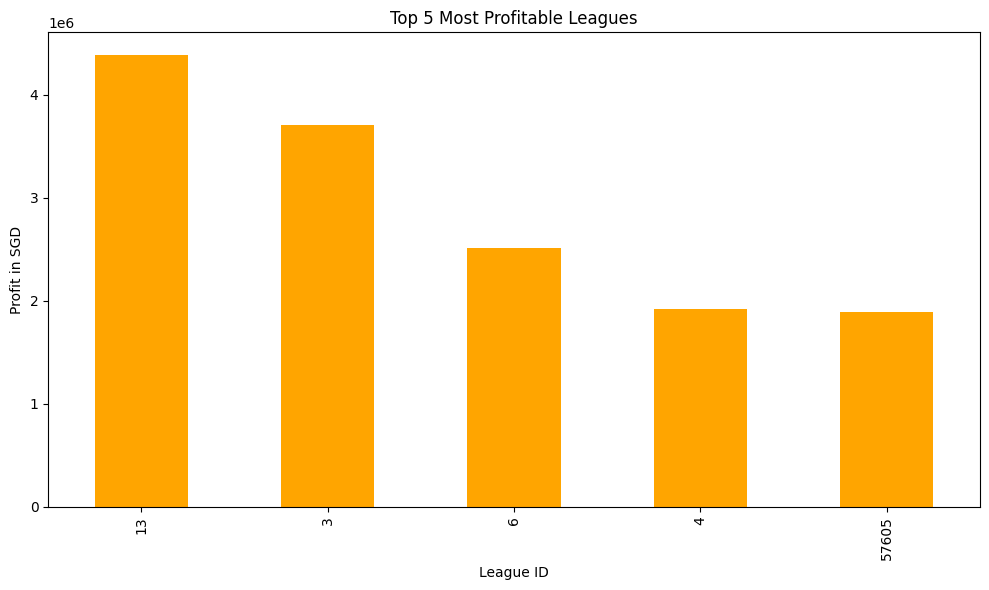

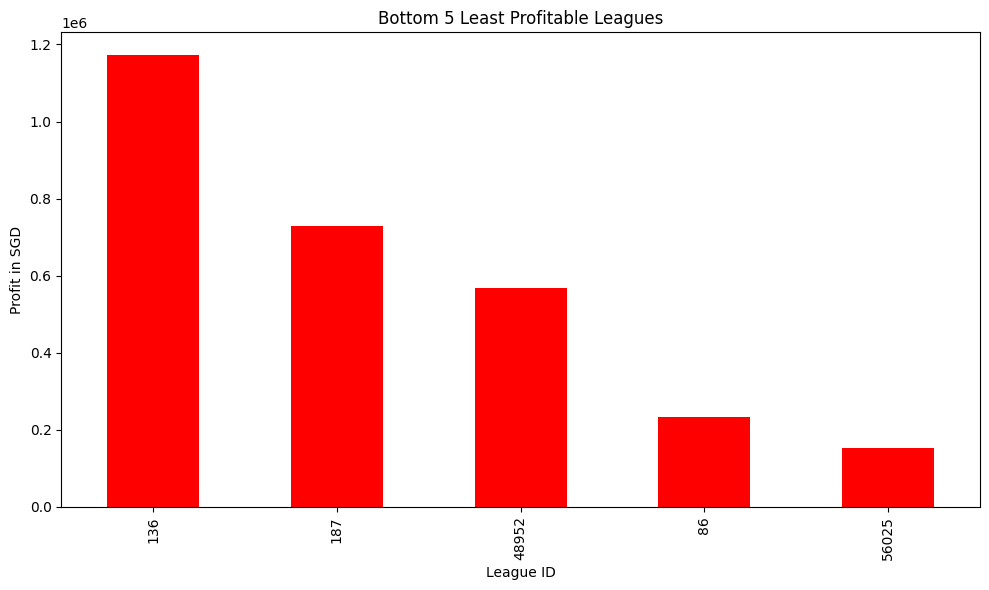

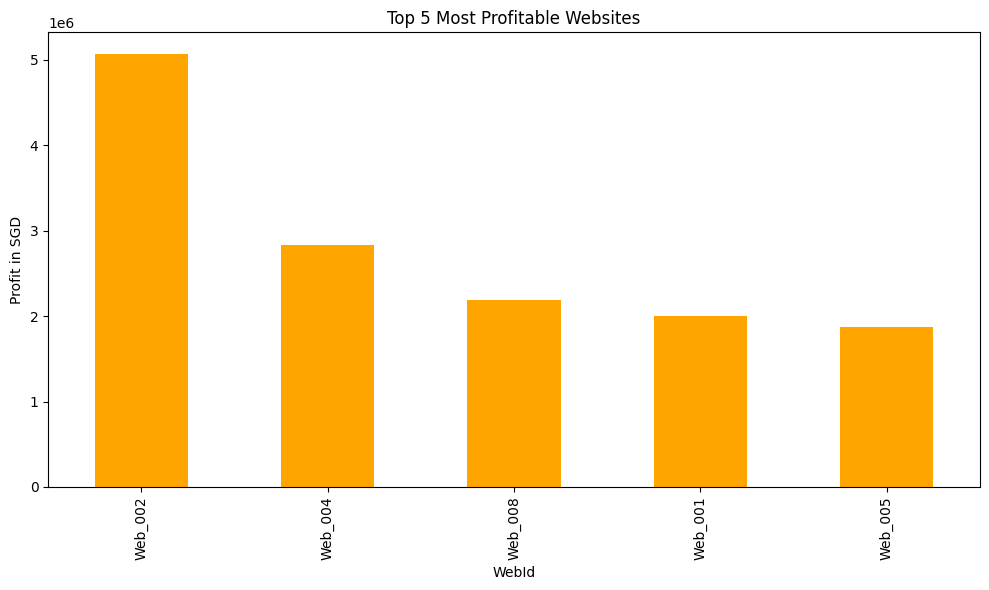

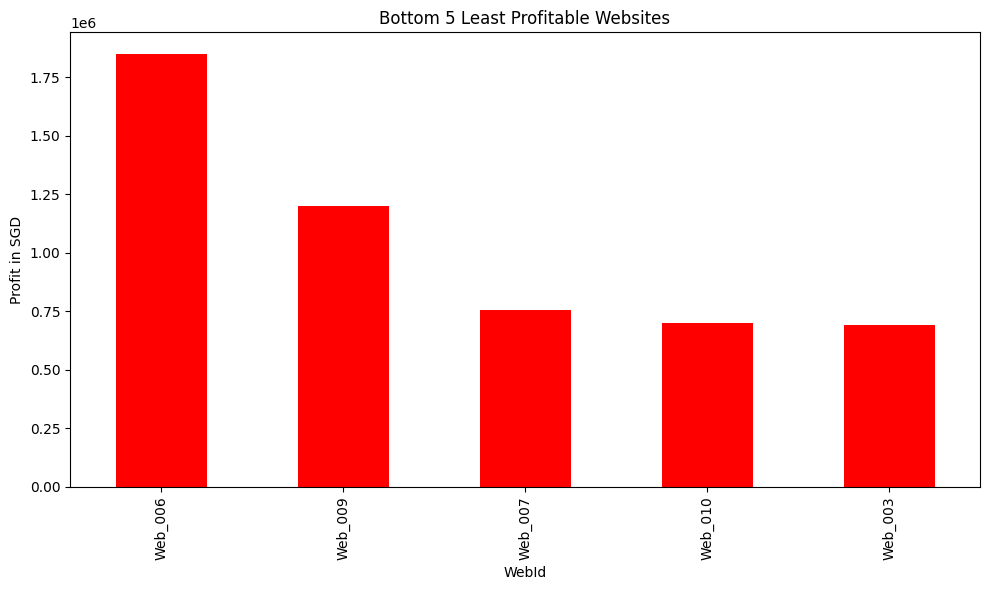

In [89]:
# Ploteo de Ligas y websites con Matplotlib

# 5 Ligas (TOP)
plt.figure(figsize=(10, 6))
top_5_leagues.plot(kind='bar', color='orange')
plt.title('Top 5 Most Profitable Leagues')
plt.ylabel('Profit in SGD')
plt.xlabel('League ID')
plt.tight_layout()
plt.show()

# 5 ligas (INF)
plt.figure(figsize=(10, 6))
bottom_5_leagues.plot(kind='bar', color='red')
plt.title('Bottom 5 Least Profitable Leagues')
plt.ylabel('Profit in SGD')
plt.xlabel('League ID')
plt.tight_layout()
plt.show()

# 5 Websites (TOP)
plt.figure(figsize=(10, 6))
top_5_websites.plot(kind='bar', color='orange')
plt.title('Top 5 Most Profitable Websites')
plt.ylabel('Profit in SGD')
plt.xlabel('WebId')
plt.tight_layout()
plt.show()

# 5 Websites (INF)
plt.figure(figsize=(10, 6))
bottom_5_websites.plot(kind='bar', color='red')
plt.title('Bottom 5 Least Profitable Websites')
plt.ylabel('Profit in SGD')
plt.xlabel('WebId')
plt.tight_layout()
plt.show()

---

# Assignment 2:

A continuación se mostrarán 5 insights encontrados en la data y se explicará el por que fue elegido.

In [90]:
# 1. Tasa de victoria general (usando Winlost > 0 para indicar victoria)

total_bets = len(df)
won_bets = df[df['Winlost'] > 0].shape[0]
win_rate = won_bets / total_bets

print("Insight 1: Tasa de victoria general:")
print(f"{win_rate:.2%} de las apuestas resultaron en ganancia.\n")

Insight 1: Tasa de victoria general:
54.66% de las apuestas resultaron en ganancia.



Un indicador de rendimiento de referencia. Muestra la frecuencia con la que las apuestas resultan en profit, mostrando tendencias generales de los resultados de las apuestas. Necesario para evaluar la eficiencia del sistema.

In [91]:
# 2. Promedio de ganancia por tipo de apuesta

avg_profit_by_bettype = df.groupby('BetType')['Profit_SGD'].mean().sort_values(ascending=False)

print("Insight 2: Tipo de apuesta más rentable en promedio:")
print(avg_profit_by_bettype.head(1), "\n")

Insight 2: Tipo de apuesta más rentable en promedio:
BetType
1    28.268548
Name: Profit_SGD, dtype: float64 



Ayuda a elegir el tipo de apuesta mas rentable.

In [92]:
# 3. Rentabilidad: Apuestas en vivo vs. previas al partido

live_profit = df[df['LiveIndicator'] == True]['Profit_SGD'].sum()
non_live_profit = df[df['LiveIndicator'] == False]['Profit_SGD'].sum()

print("Insight 3: Rentabilidad total por tipo de apuesta:")
print(f"Apuestas EN VIVO: SGD {live_profit:,.2f}")
print(f"Apuestas NORMALES: SGD {non_live_profit:,.2f}\n")

Insight 3: Rentabilidad total por tipo de apuesta:
Apuestas EN VIVO: SGD 11,963,000.86
Apuestas NORMALES: SGD 7,204,263.71



Obtener una comparativa en profit de apuestas en vivo y apuestas previas al partido.

In [93]:
# 4. Promedio de monto apostado en apuestas ganadas y perdidas (según Winlost)

avg_stake_won = df[df['Winlost'] > 0]['Actual_Stake'].mean()
avg_stake_lost = df[df['Winlost'] == 0]['Actual_Stake'].mean()

print("Insight 4: Monto promedio apostado:")
print(f"Apuestas GANADAS: {avg_stake_won:.2f}")
print(f"Apuestas PERDIDAS: {avg_stake_lost:.2f}\n")

Insight 4: Monto promedio apostado:
Apuestas GANADAS: 1543.41
Apuestas PERDIDAS: 1125.60



Muestra si hay una diferencia de comportamiento entre apuestas ganadas y perdidas.
Ayuda a entender si los usuarios tienden a apostar montos mayores cuando ganan o pierden. Esto puede ser útil para analizar perfiles y crear incentivos o bonos con cuotas personalizadas.

In [94]:
# 5. Liga con mayor número de apuestas

most_bet_on_league = df['LeagueId'].value_counts().idxmax()
most_bet_on_league_count = df['LeagueId'].value_counts().max()

print("Insight 5: Liga más apostada:")
print(f"{league_names.get(most_bet_on_league, 'Liga desconocida')} con {most_bet_on_league_count} apuestas.")

Insight 5: Liga más apostada:
UEFA Champions League con 199742 apuestas.


Indica la liga con mayor demanda en la plataforma. Puede ser beneficioso para repuntar ligas con baja demanda o darle más promociones a la más popular con el fin de que más jugadores entren.

---
# Assignment 3

Noté una diferencia considerable entre apuestas en vivo y apuestas previas al partido, siendo una diferencia cerca a SGD 5mill. Un aproximado de 66% de profit más en apuestas en vivo que en apuestas previas. Por lo que mi recomendación es promover o fomentar el Live Betting.

Esto se puede apreciar en el Insight #3.

- Implementar un segmento más visible en la página para las apuestas en vivo es factible para aumentar las apuestas en vivo.
- Ofrecer notificaciones en vivo también favorecerá a las apuestas en vivo.
- Dar bonificaciones por apuestas en vivo es una alternativa pero es necesario tomar en consideración que algunas podrían resultar obvias para los usuarios y resultar negativas para la casa de apuestas.

Tener en cuenta que al apostar en vivo se cuenta con estos beneficios, y deberían de ser recordados al usuario. Las personas apuestan cuando están seguras de ganar, por lo que dar seguridad fomentará sus apuestas.

Algunos beneficios que favorecerán a esta seguridad son:
- Rendimiento de los jugadores ya fue visto
- Se tiene información contextual, como el momentum del partido o las tarjetas ocurridas.

Detectar apuestas favorables que en un inicio no existían se vuelve más realista debido a la nueva información obtenida.

---
# Assignment 4

In [95]:
# Dataset solo con EPL

epl_df = df[
    (df['LeagueId'] == 3) &
    df['Actual_Stake'].notna() &
    df['Odds'].notna() &
    df['LiveIndicator'].notna() &
    df['BetType'].notna() &
    df['MaxBet'].notna() &
    df['Status'].notna() &
    df['CurrencyStr'].notna()
].copy()

# Declaracion de variables

epl_df['LiveIndicator'] = epl_df['LiveIndicator'].astype(int)
epl_df['Status'] = epl_df['Status'].astype('category').cat.codes

# Crear matriz de features para clustering

features = epl_df[['Actual_Stake', 'Odds', 'LiveIndicator', 'BetType', 'MaxBet', 'Status']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Aplicar KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
epl_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Calcular promedio de Actual_Stake por perfil
cluster_avg_stake = epl_df.groupby('Cluster')['Actual_Stake'].mean()
epl_df['Predicted_Stake'] = epl_df['Cluster'].map(cluster_avg_stake)

# 6. Predicción final por moneda
predicted_by_currency = epl_df.groupby('CurrencyStr')['Predicted_Stake'].mean().round(2)
print(predicted_by_currency)



CurrencyStr
AUD       854.46
BDT       970.70
BRL       725.19
CNY       880.58
HKD       713.84
IDO    401045.22
IDR       769.86
INR       970.70
LAK    137099.81
MMK       788.89
MYR       855.82
NGN       703.84
THB       781.20
USD       772.70
VND       762.45
VNO    433628.41
Name: Predicted_Stake, dtype: float64


El assignment esta basado en la ausencia de datos de mayo para EPL

Estabilidad de patrones de usuario:

- Se asume que el comportamiento de los apostadores (perfiles de stake) no cambia significativamente mes a mes. Por lo tanto, los patrones observados históricamente son válidos como estimación para mayo.

Se utilizó KMeans Clustering para segmentar el comportamiento de los jugadores en EPL según:

- `Odds`
- `LiveIndicator`
- `BetType`
- `MaxBet`
- `Status`
- `Actual_Stake`

El objetivo fue agrupar perfiles similares de apostadores.

Las predicciones de `Actual_Stake` para mayo en EPL están fundamentadas en análisis de patrones reales de comportamiento de usuarios, con la técnica de clustering para inferir perfiles típicos.